In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
# age — age in years
# sex — (1 = male; 0 = female)
# cp — chest pain type
# trestbps — resting blood pressure (in mm Hg on admission to the hospital)
# chol — serum cholestoral in mg/dl
# fbs — (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# restecg — resting electrocardiographic results
# thalach — maximum heart rate achieved
# exang — exercise induced angina (1 = yes; 0 = no)
# oldpeak — ST depression induced by exercise relative to rest
# slope — the slope of the peak exercise ST segment
# ca — number of major vessels (0–3) colored by flourosopy
# thal — 3 = normal; 6 = fixed defect; 7 = reversable defect
# target — have disease or not (1=yes, 0=no)

In [3]:
data = pd.read_csv('heart.csv')
data.columns = ['Age','Sex','Chest_Pain','Resting_bps','Cholestrol','Fasting_BS','Resting_ECG','Max_HR','Exercise_Anigma','OldPeak','Slope','CA','Thal','target']

In [4]:
#  data.head(20)

In [5]:
data.target.value_counts()

0    163
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [6]:
data1 = data.copy()
mask = (data1['target'] == 2)
data1['target'] = data1['target'].mask(mask, 1)
mask = (data1['target'] == 3)
data1['target'] = data1['target'].mask(mask, 1)
mask = (data1['target'] == 4)
data1['target'] = data1['target'].mask(mask, 1)

In [7]:
data1.target.value_counts()

0    163
1    139
Name: target, dtype: int64

In [8]:
data2 = data1.dropna()

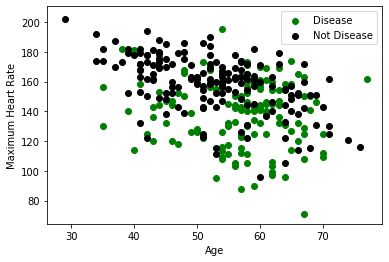

In [9]:
plt.scatter(x=data1.Age[data1.target==1], y=data1.Max_HR[(data1.target==1)], c="green")
plt.scatter(x=data1.Age[data1.target==0], y=data1.Max_HR[(data1.target==0)], c = 'black')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [10]:
X = data2.iloc[:,:-1].values
y = data2.iloc[:,13].values

In [11]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [12]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.86


In [14]:
a=[X_test[1]]

In [15]:
y_pred = classifier.predict(a)


In [16]:
print(y_pred)

[1]
